In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection

In [3]:
train_df = pd.read_csv("kagglepro1db/train.csv")
test_df = pd.read_csv("kagglepro1db/test.csv")

Data Preparation

In [4]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age's NA: 0


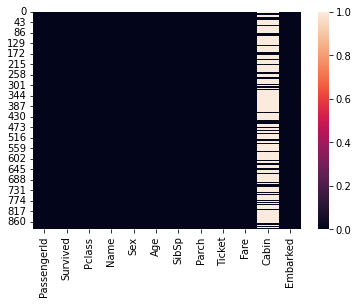

In [9]:
sns.heatmap(train_df.isna())
print("Age's NA:",train_df['Age'].isna().sum())

In [8]:
# # Data Imputation
# train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)

In [12]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Data Normalization

In [11]:
train_df['Sex'].replace(to_replace='male', value=0, inplace=True)
train_df['Sex'].replace(to_replace='female', value=1, inplace=True)

Exploratory Data Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

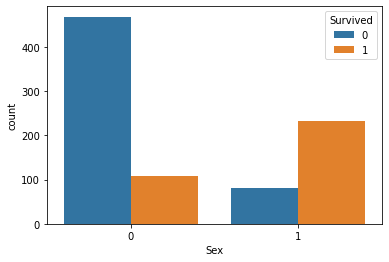

In [13]:
sns.countplot(train_df, x = train_df['Sex'], hue=train_df['Survived'])

Feature Selection

In [14]:
features = ['Pclass','Sex','Age','SibSp']
labels = ['Survived']

In [15]:
X = train_df[features]
y = train_df[labels]

In [16]:
X

,Pclass,Sex,Age,SibSp
0,3,0,22.000000,1
1,1,1,38.000000,1
2,3,1,26.000000,0
3,1,1,35.000000,1
4,3,0,35.000000,0
...,...,...,...,...
886,2,0,27.000000,0
887,1,1,19.000000,0
888,3,1,29.699118,1
889,1,0,26.000000,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104,test_size=0.25, shuffle=True)

Model Selected: Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
lr = LogisticRegression()

In [20]:
lr.fit(X_train,y_train)

c:\Users\aaaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)

In [22]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,118,27
Actual Yes,21,57


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       145
           1       0.68      0.73      0.70        78

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.79      0.78      0.79       223



In [26]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q


In [25]:
test_df['Sex'].replace(to_replace='male', value=0, inplace=True)
test_df['Sex'].replace(to_replace='female', value=1, inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)

In [27]:
test_pred = lr.predict(test_df[features])

In [30]:
test_ids = test_df["PassengerId"]

In [32]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": test_pred,
                  })

In [34]:
df.to_csv("submission.csv", index=False)